# ML

### KNN

iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 준비

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

X = iris_dataset['data']
y = iris_dataset['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# y의 분포를 지키면서 훈련데이터와 테스트데이터로 나눠라
# 회귀에서는 필요없고, 범주에서는 필요하다

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [3]:
# 모델 훈련(학습)

# iris_dataset은 species : setosa, versicolor, virginica 범주를 예측하는 분류 모델
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_train, y_train), knn_classifier.score(X_test, y_test)

(0.9732142857142857, 0.9736842105263158)

In [14]:
train_scores = []
test_scores = []
for k in np.arange(1, 10, 2):    # k는 1부터 10까지 2씩 증가 > 1, 3, 5, 7, 9
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    train_scores.append(knn_classifier.score(X_train, y_train))
    test_scores.append(knn_classifier.score(X_test, y_test))
    

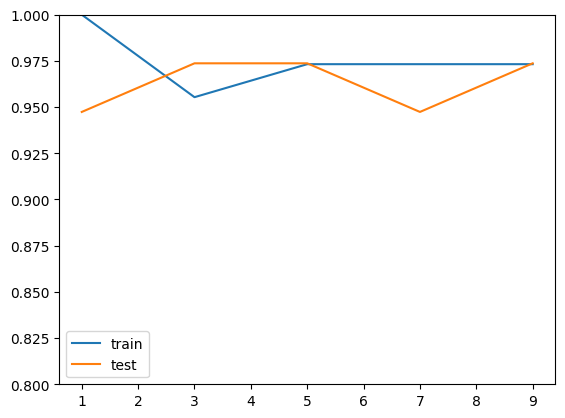

In [19]:
plt.plot(np.arange(1, 10, 2), train_scores, label = "train")
plt.plot(np.arange(1, 10, 2), test_scores, label = "test")
plt.ylim((0.8, 1))
plt.legend()
plt.show()


In [4]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X.mean(axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [ ]:
# 모델 사용
# 프로젝트 할 때, 이 부분이 중요하다. 모델을 만들었으면 의미있게 써야지

features = []
for feature_name in iris_dataset['feature_names']:
    input_value = input("{0} : ".format(feature_name))
    features.append(float(input_value))

predicted_class = knn_classifier.predict([features])
species = iris_dataset['target_names'][predicted_class]
print("You have {0}".format(species))

You have ['versicolor']


In [29]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 실습

diabetes

In [20]:
# sklearn.datasets.load_diabetes
# 1. target 찾기
# 2. target의 데이터 종류 찾기 -> 분류 모델 또는 회귀 모델 선택 기준
# 3. 훈련/테스트 세트 준비
# 4. KNN 모델 훈련
# 5. 모델 평가

In [23]:
# 데이터 준비 1

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
diabetes_dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
# 데이터셋 구조 확인
print(diabetes_dataset.keys())

# 데이터와 타겟 확인
X = diabetes_dataset['data']
y = diabetes_dataset['target']

# 특징과 타겟 정보 출력
print(f"Feature names: {diabetes_dataset['feature_names']}")
print(f"X shape: {X.shape}, y shape: {y.shape}")
y   # 너무 많은 숫자들 - 분류 아닌 회귀 사용 결정

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X shape: (442, 10), y shape: (442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [34]:
# 데이터 준비 2

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [35]:
# 모델 훈련(학습)

from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train, y_train)
train_score = knn_regressor.score(X_train, y_train)
test_score = knn_regressor.score(X_test, y_test)
train_scores, test_score

([1.0,
  0.9553571428571429,
  0.9732142857142857,
  0.9732142857142857,
  0.9732142857142857],
 0.44659346214225026)

In [ ]:
train_scores = []
test_scores = []

# 다양한 k 값에 대해 성능 평가
k_values = np.arange(1, 30)
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    train_scores.append(knn_regressor.score(X_train, y_train))
    test_scores.append(knn_regressor.score(X_test, y_test))

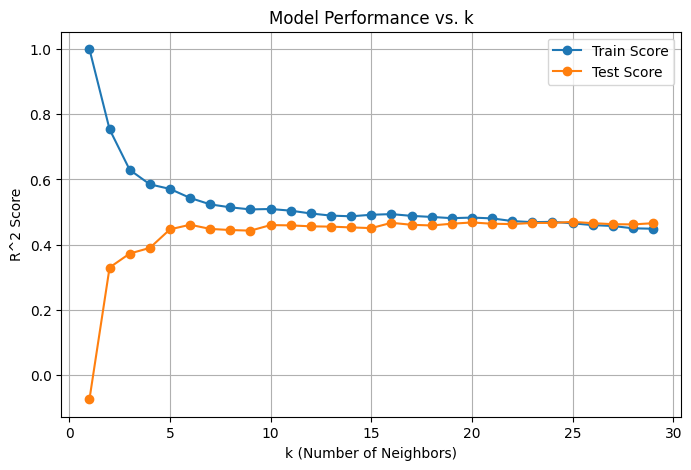

In [42]:
# 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_scores, label="Train Score", marker='o')
plt.plot(k_values, test_scores, label="Test Score", marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("R^2 Score")
plt.title("Model Performance vs. k")
plt.legend()
plt.grid()
plt.show()

In [44]:
X.mean(axis=0)

array([-1.44429466e-18,  2.54321451e-18, -2.25592546e-16, -4.85408596e-17,
       -1.42859580e-17,  3.89881064e-17, -6.02836031e-18, -1.78809958e-17,
        9.24348582e-17,  1.35176953e-17])

In [43]:
# 새 데이터 입력받기
features = []
for feature_name in diabetes_dataset['feature_names']:
    input_value = input(f"{feature_name}: ")
    features.append(float(input_value))

# 입력 데이터 예측
predicted_value = knn_regressor.predict([features])
print(f"Predicted target value: {predicted_value[0]:.2f}")

Predicted target value: 245.07


### 선생님과 함께

In [57]:
# 데이터 준비
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes_dataset = load_diabetes()

# print( diabetes_dataset['feature_names'] )
# print( diabetes_dataset['data'][:3] )
# print( diabetes_dataset['target'][:10] ) # target이 혈당수치임

X = diabetes_dataset['data']
y = diabetes_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
# print( np.mean(diabetes_dataset['data'], axis=0) )
# # 이미 데이터가 스케일링 되어서, 평균들이 다 0에 수렴한다
# np.std(diabetes_dataset['data'], axis=0)

In [80]:
# 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

scores = []
for k in np.arange(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append((k, 
                   knn.score(X_train, y_train),     # train scroe
                   knn.score(X_test, y_test)))      # test score

In [81]:
# 모델 평가 / 해석
scores_df = pd.DataFrame(scores, columns=['neighbors', 'train_score', 'test_score'])
scores_df.head(3), scores_df.tail(3), scores_df['test_score'].max()

(   neighbors  train_score  test_score
 0          1     1.000000   -0.075355
 1          3     0.629300    0.372222
 2          5     0.570761    0.446593,
    neighbors  train_score  test_score
 7         15     0.491395    0.450391
 8         17     0.487975    0.460571
 9         19     0.480923    0.463862,
 np.float64(0.463861576720479))

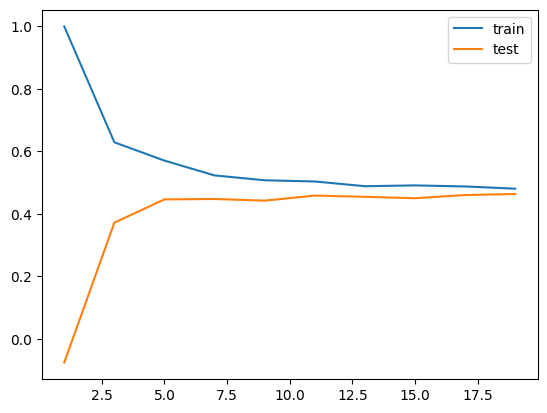

In [82]:
plt.plot(scores_df['neighbors'], scores_df['train_score'], label = 'train')
plt.plot(scores_df['neighbors'], scores_df['test_score'], label = 'test')
plt.legend()
# plt.xlim(20, 30)
plt.show()

In [ ]:
# [실습 후 모델 해석]
# 분류는 모델을 평가할때 평가지표가 몇가지 있음. 
# 분류 평가지표는 11번 ppt에서 다룰 예정.
# 분류는 간단하게 보면, 몇 개 맞추었는가를 가지고 판단
# 이 판단 지표를 accuracy 정확도있고, f1스코어, roc커브 등 여러 평가 지표가 있으나, 
# 가장 간단한 평가지표는 accuracy다. - 전체 중 몇 개 맞추었는지.
# 평가는 score 함수 사용
# 회귀는 R스퀘어드라고, 보통 0~1사이 값이 나오고, 
# 1에 가까울수록 좋은 모델, 0에 가까울수록 안 좋은 모델임. (절대적인 건 아님)
# (보통 0.9 이상이면 아주 좋다, 0.3 이하면 나쁘다고 판단)
# 데이터로 산출되는 선(주로 / 이런 모양)과, 데이터의 평균(수평값, 주로 - 이런 모양)을 그래프로 그렸을때,
# 한 값이 평균으로부터 얼마나 떨어져 있는가 - 오차
# 오차/전체 > 전체에서 오차 계산, 오차가 얼마인지 중요. 오차가 0이라면, 전체는 0.
# 그래서 (1 - 오차/전체)임. 오차는 도출된 선으로 부터 거리인듯? 
# 사선과 가까울수록 값이 1에 가깝고, 멀수록 0에 가까움
# 평균으로부터 떨어진 변동. 회귀선에 가까울수록 좋음.
# 실제 계산은 ppt 12쪽
# R^2 = 설명된변동/총변동
# 회귀는 평가시 R^2 값을 사용한다.


In [88]:
# 모델 평가 / 해석 2
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
# 절댓값 에러, 제곱한 에러 > 규모가 아주 커짐, 제곱한 것을 다시 루트 씌운 에러

final_knn = KNeighborsRegressor(n_neighbors=7)
final_knn.fit(X_train, y_train)

train_predicted_y = final_knn.predict(X_train)
test_predicted_y = final_knn.predict(X_test)

mean_absolute_error(y_train, train_predicted_y), mean_absolute_error(y_test, test_predicted_y), \
    mean_absolute_error(y_train, train_predicted_y) / np.mean(y_train), \
    mean_absolute_error(y_test, test_predicted_y) / np.mean(y_test)

root_mean_squared_error(y_train, train_predicted_y)

np.float64(53.67868646954995)

모델 평가는 R^2(plot으로 그린 것)는 참고 도구이고, 반드시 실제 오차(mae와 mse)를 봐야한다

In [89]:
# 1. 데이터 준비 > 이 전에 전처리, 탐색적 분석 다 해야함
#     이때, 훈련/테스트 데이터 나눠주고, 어떤 모델 쓸지 결정
# 2. 모델 훈련
#     모델에서 하이퍼파라미터 어떻게 조정할 것인지, 그에따라 모델어떻게 작동하는지 최적점 어딘지 찾아야해
# 3. 모델 평가
#     주로 정확도를 많이 사용함. 

# 회귀모델인 경우도, 유사한 과정. 
#     단 평가할때 실제값이 어떤지 확인하고 모델 평가